In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from keras.datasets import mnist

from keras.layers import Flatten, Dense, Reshape
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
img_rows=28
img_cols=28
img_channels=1

img_shape=(img_rows, img_cols, img_channels)

zdim=100

4/4 [==============================] - 0s 2ms/step
1000 [D loss: 3.153712, Acc: 57.42] [G loss: 0.937403]
4/4 [==============================] - 0s 1ms/step


C:\Users\zmaso\AppData\Local\Temp\ipykernel_15424\2858315161.py:88: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


4/4 [==============================] - 0s 2ms/step
2000 [D loss: 4.507426, Acc: 62.89] [G loss: 2.352884]
4/4 [==============================] - 0s 2ms/step
3000 [D loss: 5.911459, Acc: 66.02] [G loss: 4.066318]
1/1 [==============================] - 0s 19ms/step


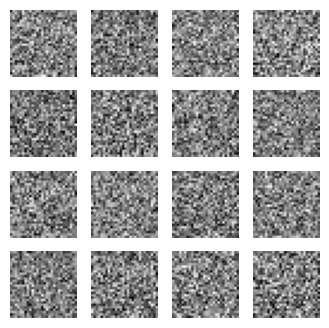

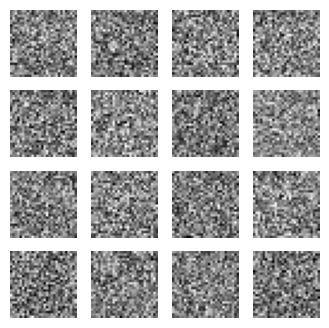

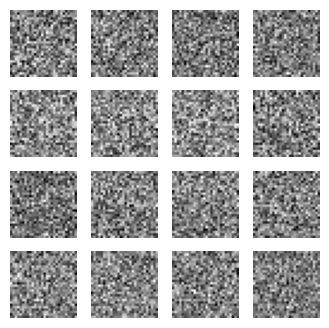

In [4]:
def build_gen(img_shape, zdim):
    """generating fake data based on real data features and input shapes"""
    model = Sequential()
    model.add(Dense(128, input_dim=zdim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape(img_shape))
    return model


def build_dis(img_shape):
    """discriminating the real data nad fake data generated in build_gen function"""
    model=Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_gan(gen, dis):
    """functioning generation and discrimination to produce a result as a loss and accuracy metrics"""
    model = Sequential()
    model.add(gen)
    model.add(dis)
    return model

dis_v = build_dis(img_shape)
dis_v.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


gen_v = build_gen(img_shape, zdim)
gen_v.trainable = False #the weights of dis_v is transferred into gen_v without any changes

gan_v = build_gan(gen_v, dis_v)
gan_v.compile(loss='binary_crossentropy',
              optimizer=Adam()
             )

losses = [] #collecting losses in one list
accuracies = []#collecting accuracies in one list
iteration_checks = []

def train(iterations, batch_size, interval):
    #interval is a parameter that after how many iteration the function show the result
    (xtrain, _), (_, _) = mnist.load_data()
    xtrain = np.expand_dims(xtrain, axis=3) #adding one more dimension into input xtrain because of the number of images index as 60,000 images

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size,1))

    for iteration in range(iterations):
        ids = np.random.randint(0, xtrain.shape[0], batch_size)
        imgs = xtrain[ids]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = gen_v.predict(z)

        dloss_real = dis_v.train_on_batch(imgs, real)
        dloss_fake = dis_v.train_on_batch(gen_imgs, fake)

        dloss, accuracy = 0.5 * np.add(dloss_real, dloss_fake)

        z = np.random.normal(0, 1, (batch_size, 100))
        gloss = gan_v.train_on_batch(z, real)

        if (iteration+1) % interval == 0:
            losses.append((dloss, gloss))
            accuracies.append(100 *accuracy)
            iteration_checks.append(iteration+1)

            print("%d [D loss: %f, Acc: %.2f] [G loss: %f]" %
                  (iteration+1, dloss, 100*accuracy, gloss))
            show_images(gen_v)

def show_images(gen):
    z = np.random.normal(0, 1, (16, 100))
    gen_imgs = gen.predict(z)
    gen_imgs = 0.5*gen_imgs + 0.5

    fig, axs = plt.subplots(4, 4, figsize=(4,4), sharey=True, sharex=True)
    cnt = 0 
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap= 'gray')
            axs[i, j].axis('off')
            cnt+=1


    fig.show()

train(3000, 128, 1000)




        
